In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
from google.colab import files

In [314]:
import io

In [318]:
uploaded=files.upload()
data=pd.read_csv(io.BytesIO(uploaded['resultados partidos.csv(7)']),sep=';')


KeyboardInterrupt: 

In [316]:
data.head()

,Temporada,Jornada,VS,Goles a Favor,Goles en contra,En casa,Visitante,Clasificación,Resultado
0,2006,1,Nueva sevilla B,4,1,0,1,1,"(1,)"
1,2006,2,Necropolis,6,2,1,0,1,"(1,)"
2,2006,3,U.D.E. Abre,2,2,0,1,2,0
3,2006,4,Mures,5,2,1,0,2,"(1,)"
4,2006,5,Espartinas,3,1,0,1,1,"(1,)"


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Temporada,0
Jornada,0
VS,0
Goles a Favor,0
Goles en contra,0
En casa,0
Visitante,0
Clasificación,0
Resultado,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 574
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temporada        569 non-null    int64 
 1   Jornada          569 non-null    int64 
 2   VS               569 non-null    object
 3   Goles a Favor    569 non-null    int64 
 4   Goles en contra  569 non-null    int64 
 5   En casa          569 non-null    int64 
 6   Visitante        569 non-null    int64 
 7   Clasificación    569 non-null    object
 8   Resultado        569 non-null    object
dtypes: int64(6), object(3)
memory usage: 44.5+ KB


In [ ]:
data[['Goles a Favor','Goles en contra','En casa','Visitante']]=data[['Goles a Favor','Goles en contra','En casa','Visitante']].astype(int)

In [ ]:
data

,Temporada,Jornada,VS,Goles a Favor,Goles en contra,En casa,Visitante,Clasificación,Resultado
0,2006,1,Nueva sevilla B,4,1,0,1,1,"(1,)"
1,2006,2,Necropolis,6,2,1,0,1,"(1,)"
2,2006,3,U.D.E. Abre,2,2,0,1,2,0
3,2006,4,Mures,5,2,1,0,2,"(1,)"
4,2006,5,Espartinas,3,1,0,1,1,"(1,)"
...,...,...,...,...,...,...,...,...,...
570,2023,30,Atl Villanueva,5,1,1,0,1,"(1,)"
571,2023,31,Mairena del aljarafe,2,0,0,1,1,"(1,)"
572,2023,32,Huevar,1,0,1,0,1,"(1,)"
573,2023,33,Cantarrana,2,1,0,1,1,"(1,)"


# Análisis de datos

In [ ]:
goles=data[['Goles a Favor','Goles en contra']]

In [ ]:
goles.sum()

,0
Goles a Favor,932
Goles en contra,882


In [ ]:
goles.describe()

,Goles a Favor,Goles en contra
count,569.000000,569.000000
mean,1.637961,1.550088
std,1.567394,1.373044
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,13.000000,8.000000


In [ ]:
diferencia_goles=data['Goles a Favor']-data['Goles en contra']

diferencia_goles.sum()

50

A lo largo de las 20 temporadas, el mayor numero de goles a favor en un partido ha sido 13 goles.
El mayor numero de goles en contra en un partido ha sido 8 goles.

El equipo marca una media de 1.64 goles por partido, y recibe 1.54. Por lo tanto marca mas que recibe aunque con un margen pequeño
la diferencia de goles ha sido de 53 goles

In [ ]:
import plotly.express as px

In [ ]:

fig=px.bar(data_frame=goles.sum(),color=('A favor','En contra'))

fig.update_xaxes(title='')
fig.update_yaxes(title='Número de goles')

In [ ]:
goles_a_favor_en_casa=data[data['En casa']==1.0]['Goles a Favor'].sum()
goles_en_contra_en_casa=data[data['En casa']==1.0]['Goles en contra'].sum()

In [ ]:
goles_en_casa=[goles_a_favor_en_casa,goles_en_contra_en_casa]
etiquetas=['Goles a favor en casa','Goles en contra en casa']

In [ ]:
goles_en_casa

[541, 363]

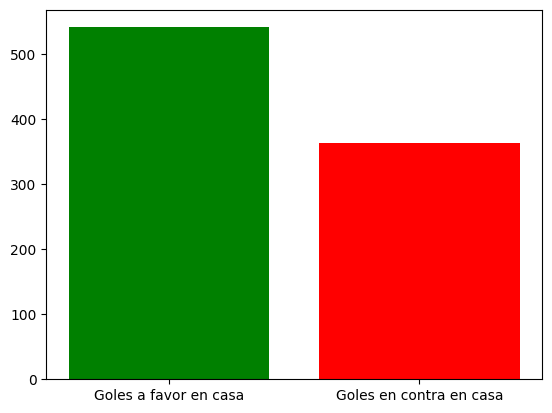

In [ ]:
plt.bar(etiquetas,goles_en_casa,color=('green','red'))
plt.show()

In [ ]:
goles_a_favor_fuera=data[data['Visitante']==1.0]['Goles a Favor'].sum()
goles_en_contra_fuera=data[data['Visitante']==1.0]['Goles en contra'].sum()
goles_fuera=[goles_a_favor_fuera,goles_en_contra_fuera]
etiquetas_fuera=['goles_a_favor_fuera','goles_en_contra_fuera']

<BarContainer object of 2 artists>

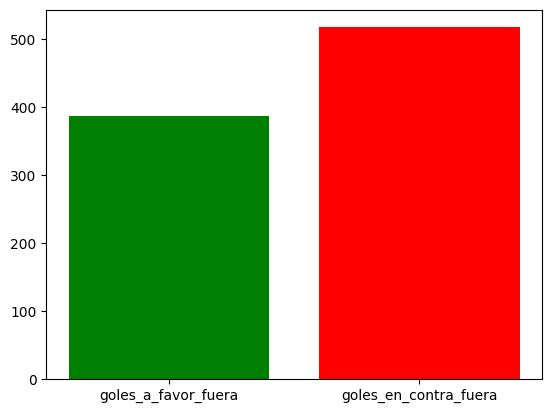

In [ ]:
plt.bar(etiquetas_fuera,goles_fuera,color=('green','red'))

In [ ]:
print(f'el numero de goles en casa fueron {goles_a_favor_en_casa} a favor y {goles_en_contra_en_casa} en contra ')
print(f'el numero de goles fuera se establece en {goles_a_favor_fuera} a favor y {goles_en_contra_fuera} en contra ')

el numero de goles en casa fueron 541 a favor y 363 en contra 
el numero de goles fuera se establece en 387 a favor y 517 en contra 


In [ ]:
media_goles_en_contra_visitante=data[data['Visitante']==1.0]['Goles en contra'].mean()
media_goles_en_contra_local=data[data['En casa']==1.0]['Goles en contra'].mean()
print(f'La media de goles en contra como local es {round(media_goles_en_contra_local,2)} y {round(media_goles_en_contra_visitante,2)} como visitante ')

La media de goles en contra como local es 1.26 y 1.85 como visitante 


In [ ]:
partidos_ganados=data[data['Goles a Favor']>data['Goles en contra']].shape[0]
partidos_perdidos=data[data['Goles a Favor']<data['Goles en contra']].shape[0]
partidos_empatados=data[data['Goles a Favor']==data['Goles en contra']].shape[0]

In [ ]:
print(f'El numero de partidos ganados es {partidos_ganados}')
print(f'el numero de partidos empatados es {partidos_empatados}')
print(f'el numero de partidos perdidos es {partidos_perdidos}')

El numero de partidos ganados es 218
el numero de partidos empatados es 119
el numero de partidos perdidos es 232


<BarContainer object of 3 artists>

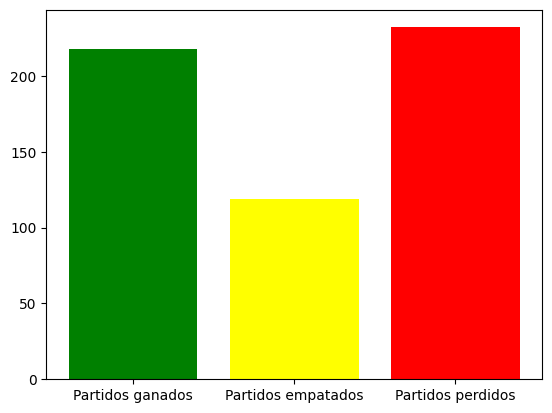

In [ ]:
vic_emp_derr=[partidos_ganados,partidos_empatados,partidos_perdidos]
etiquetas_vic_derr=['Partidos ganados','Partidos empatados','Partidos perdidos']
plt.bar(etiquetas_vic_derr,vic_emp_derr,color=('green','yellow','red'))

In [ ]:
puntos_conseguidos=(partidos_ganados) *3 + partidos_empatados
puntos_perdidos=partidos_perdidos*3
diferencia_puntos=puntos_conseguidos - puntos_perdidos
print(f'El numero de puntos conseguidos es {puntos_conseguidos}, ha perdido {puntos_perdidos}. La diferencia de puntos es {diferencia_puntos}' )

El numero de puntos conseguidos es 773, ha perdido 696. La diferencia de puntos es 77


In [ ]:
partidos_ganados_casa=data[(data['Goles a Favor']>data['Goles en contra']) & (data['En casa']==1.0)].shape[0]
partidos_ganados_fuera=data[(data['Goles a Favor']>data['Goles en contra']) & (data['Visitante']==1.0)].shape[0]
print(f'A lo largo de estos 20 años ha ganado {partidos_ganados_casa} partidos en casa y {partidos_ganados_fuera} fuera')

A lo largo de estos 20 años ha ganado 144 partidos en casa y 73 fuera


In [ ]:
partidos_perdidos_casa=data[(data['Goles a Favor']<data['Goles en contra']) & (data['En casa']==1.0)].shape[0]
partidos_perdidos_fuera=data[(data['Goles a Favor']<data['Goles en contra']) & (data['Visitante']==1.0)].shape[0]
print(f'A lo largo de estos 20 años ha perdido {partidos_perdidos_casa} partidos en casa y {partidos_perdidos_fuera} fuera')

A lo largo de estos 20 años ha perdido 85 partidos en casa y 147 fuera


In [ ]:
porcentaje_victorias_casa=(partidos_ganados_casa*100)/partidos_ganados

porcentaje_victorias_fuera=(partidos_ganados_fuera*100)/partidos_ganados
print(f'El porcentaje de victorias en casa es del {round(porcentaje_victorias_casa,2)}%')
print(f'El porcentaje de victorias a domicilio es del {round(porcentaje_victorias_fuera,2)}%')


El porcentaje de victorias en casa es del 66.06%
El porcentaje de victorias a domicilio es del 33.49%


In [ ]:
porcentaje_victorias=[porcentaje_victorias_casa,porcentaje_victorias_fuera]
etiquetas_tarta1=['porcentaje victorias local','porcentaje victorias visitante']
px.pie(values=porcentaje_victorias,names=etiquetas_tarta1,title='Porcentaje de victorias')

In [ ]:
porcentaje_derrotas_casa=(partidos_perdidos_casa*100)/partidos_perdidos

porcentaje_derrotas_fuera=(partidos_perdidos_fuera*100)/partidos_perdidos
print(f'El porcentaje de derrotas en casa es del {round(porcentaje_derrotas_casa,2)}%')
print(f'El porcentaje de derrotas a domicilio es del {round(porcentaje_derrotas_fuera,2)}%')

El porcentaje de derrotas en casa es del 36.64%
El porcentaje de derrotas a domicilio es del 63.36%


In [ ]:
porcentaje_derrotas=[porcentaje_derrotas_casa,porcentaje_derrotas_fuera]
etiquetas_tarta2=['porcentaje_derrotas_casa','porcentaje_derrotas_fuera']
px.pie(data,values=porcentaje_derrotas,names=etiquetas_tarta2,title='Porcentaje_derrotas')


In [ ]:
resultados_mas_repetidos=data[['Goles a Favor','Goles en contra']].value_counts().head()

In [ ]:
resultados_mas_repetidos=pd.DataFrame(resultados_mas_repetidos)
resultados_mas_repetidos=resultados_mas_repetidos.reset_index()

resultados_mas_repetidos

,Goles a Favor,Goles en contra,count
0,0,1,55
1,1,1,51
2,1,2,39
3,0,0,33
4,2,1,31


In [ ]:
clasificaciones_jornada_34={
    2006:5,
    2007:2,
    2008:9,
    2009:8,
    2010:14,
    2011:17,
    2012:11,
    2013:12,
    2014:13,
    2015:7,
    2016:12,
    2017:9,
    2018:11,
    2019:11,
    2020:13,
    2021:10,
    2022:14,
    2023:9,
    2024:1
}

In [ ]:
df = pd.DataFrame(list(clasificaciones_jornada_34.items()), columns=['Año', 'Clasificación'])

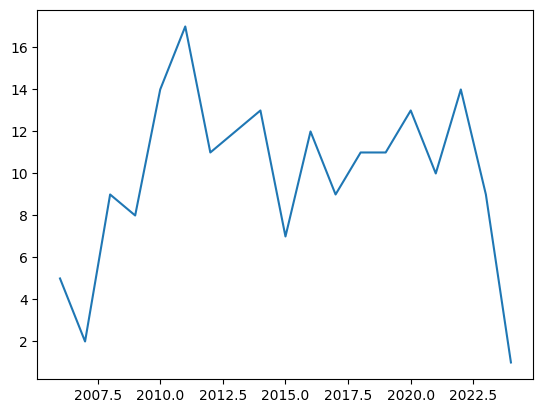

In [ ]:
plt.plot(df['Año'],df['Clasificación'])

#Clasificacion lineal

In [ ]:
import sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.DataFrame(df)

In [ ]:
x=df[['Año']]
y=df['Clasificación']

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
yhat=lr.predict(x)

In [ ]:
yhat

array([ 5,  5,  2,  8, 11, 11, 11, 11, 11, 11,  9,  9,  9,  9,  9,  9, 13,
        1,  1])

In [ ]:
y

,Clasificación
0,5
1,2
2,9
3,8
4,14
5,17
6,11
7,12
8,13
9,7


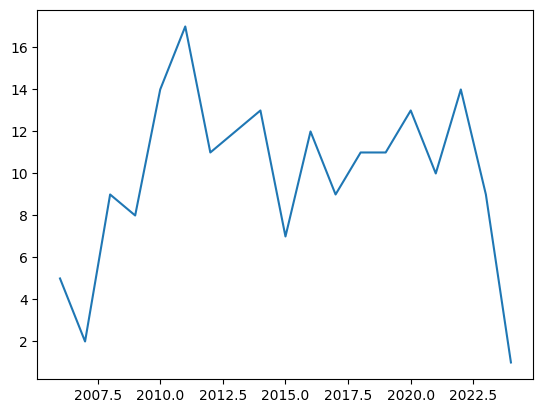

In [ ]:
plt.plot(x,y)

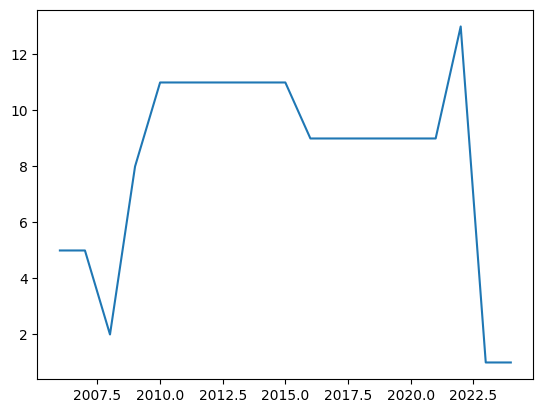

In [ ]:
plt.plot(x,yhat)

In [ ]:
año_futuro=2025

# Crear un DataFrame con el año futuro
datos_futuros = pd.DataFrame({'Año': [año_futuro]})

# Realizar la predicción
prediccion_futura = lr.predict(datos_futuros)
print("Predicción para el año", año_futuro, ":", prediccion_futura[0])

Predicción para el año 2025 : 1


# Decission tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arbol=DecisionTreeClassifier()

In [ ]:
arbol.fit(x,y)

DecisionTreeClassifier()

In [ ]:
yhat2=arbol.predict(x)

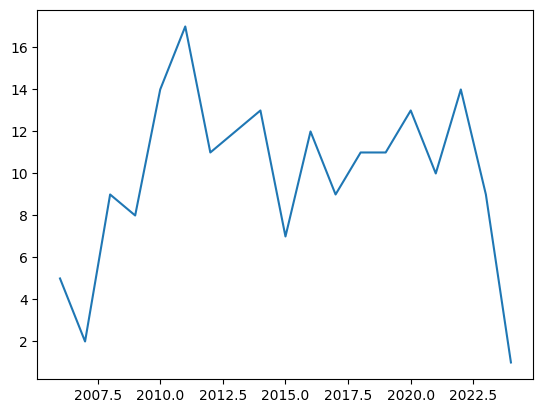

In [ ]:
plt.plot(x,yhat2)

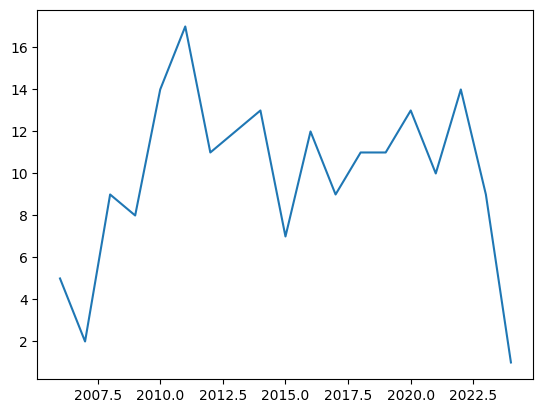

In [ ]:
plt.plot(x,y)

In [ ]:
yhat2

array([ 5,  2,  9,  8, 14, 17, 11, 12, 13,  7, 12,  9, 11, 11, 13, 10, 14,
        9,  1])

In [ ]:
arbol.predict(datos_futuros)

array([1])

# Red neuronal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

añadiendo mas variables

In [ ]:
data

,Temporada,Jornada,VS,Goles a Favor,Goles en contra,En casa,Visitante,Clasificación,Resultado
0,2006,1,Nueva sevilla B,4,1,0,1,1,"(1,)"
1,2006,2,Necropolis,6,2,1,0,1,"(1,)"
2,2006,3,U.D.E. Abre,2,2,0,1,2,0
3,2006,4,Mures,5,2,1,0,2,"(1,)"
4,2006,5,Espartinas,3,1,0,1,1,"(1,)"
...,...,...,...,...,...,...,...,...,...
570,2023,30,Atl Villanueva,5,1,1,0,1,"(1,)"
571,2023,31,Mairena del aljarafe,2,0,0,1,1,"(1,)"
572,2023,32,Huevar,1,0,1,0,1,"(1,)"
573,2023,33,Cantarrana,2,1,0,1,1,"(1,)"


In [ ]:
def calcular_resultado(row):
  if row['Goles a Favor']>row['Goles en contra']:
    return 1,
  if row['Goles a Favor']<row['Goles en contra']:
    return 2,
  if row['Goles a Favor']==row['Goles en contra']:
    return 0

In [ ]:
data['Resultado']=data.apply(calcular_resultado, axis=1)

In [ ]:
data.head(10)

,Temporada,Jornada,VS,Goles a Favor,Goles en contra,En casa,Visitante,Clasificación,Resultado
0,2006,1,Nueva sevilla B,4,1,0,1,1,"(1,)"
1,2006,2,Necropolis,6,2,1,0,1,"(1,)"
2,2006,3,U.D.E. Abre,2,2,0,1,2,0
3,2006,4,Mures,5,2,1,0,2,"(1,)"
4,2006,5,Espartinas,3,1,0,1,1,"(1,)"
5,2006,6,Umbrete,0,2,1,0,2,"(2,)"
6,2006,7,Villafranco,0,0,0,1,2,0
7,2006,8,Alcala Rio,2,2,1,0,3,0
8,2006,9,C.M.D. San Juan,1,2,0,1,4,"(2,)"
9,2006,10,Santiponce,2,1,1,0,3,"(1,)"
